# Лабораторная работа №1

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

### Загрузка данных

In [2]:
data = pd.read_csv('Intel_CPUs.csv', sep = ',' )

## 2)Основные характеристики датасета

In [3]:
# Первые пять строк датасета
data.head()

,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,...,T,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Instruction_Set_Extensions,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit
0,7th Generation Intel® Core™ i7 Processors,Mobile,i7-7Y75,Launched,Q3'16,14 nm,$393.00,2,4.0,1.30 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
1,8th Generation Intel® Core™ i5 Processors,Mobile,i5-8250U,Launched,Q3'17,14 nm,$297.00,4,8.0,1.60 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2,8th Generation Intel® Core™ i7 Processors,Mobile,i7-8550U,Launched,Q3'17,14 nm,$409.00,4,8.0,1.80 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
3,Intel® Core™ X-series Processors,Desktop,i7-3820,End of Life,Q1'12,32 nm,$305.00,4,8.0,3.60 GHz,...,66.8°C,Yes,Yes,Yes,64-bit,"SSE4.2, AVX, AES",Yes,Yes,NaN,Yes
4,7th Generation Intel® Core™ i5 Processors,Mobile,i5-7Y57,Launched,Q1'17,14 nm,$281.00,2,4.0,1.20 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes


In [6]:
# Размер датасета
data.shape

(2283, 45)

In [7]:
# Количество нулевых элементов
data.isnull().sum()

Product_Collection                             0
Vertical_Segment                               0
Processor_Number                             349
Status                                         0
Launch_Date                                  412
Lithography                                   71
Recommended_Customer_Price                   982
nb_of_Cores                                    0
nb_of_Threads                                856
Processor_Base_Frequency                      18
Max_Turbo_Frequency                         1369
Cache                                         12
Bus_Speed                                    294
TDP                                           67
Embedded_Options_Available                     1
Conflict_Free                               1076
Max_Memory_Size                              880
Memory_Types                                 883
Max_nb_of_Memory_Channels                    869
Max_Memory_Bandwidth                        1136
ECC_Memory_Supported

In [8]:
 # Колонки и их типы данных
data.dtypes

Product_Collection                           object
Vertical_Segment                             object
Processor_Number                             object
Status                                       object
Launch_Date                                  object
Lithography                                  object
Recommended_Customer_Price                   object
nb_of_Cores                                   int64
nb_of_Threads                               float64
Processor_Base_Frequency                     object
Max_Turbo_Frequency                          object
Cache                                        object
Bus_Speed                                    object
TDP                                          object
Embedded_Options_Available                   object
Conflict_Free                                object
Max_Memory_Size                              object
Memory_Types                                 object
Max_nb_of_Memory_Channels                   float64
Max_Memory_B

In [9]:
# Описание датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Product_Collection                        2283 non-null   object 
 1   Vertical_Segment                          2283 non-null   object 
 2   Processor_Number                          1934 non-null   object 
 3   Status                                    2283 non-null   object 
 4   Launch_Date                               1871 non-null   object 
 5   Lithography                               2212 non-null   object 
 6   Recommended_Customer_Price                1301 non-null   object 
 7   nb_of_Cores                               2283 non-null   int64  
 8   nb_of_Threads                             1427 non-null   float64
 9   Processor_Base_Frequency                  2265 non-null   object 
 10  Max_Turbo_Frequency                 

In [10]:
# Статистические данные
data.describe()

,nb_of_Cores,nb_of_Threads,Max_nb_of_Memory_Channels,Processor_Graphics_,Support_4k,OpenGL_Support,Max_nb_of_PCI_Express_Lanes
count,2283.000000,1427.000000,1414.000000,0.0,0.0,0.0,1179.000000
mean,4.066579,8.728101,2.615276,NaN,NaN,NaN,20.399491
std,6.329884,9.132518,1.470327,NaN,NaN,NaN,12.868963
min,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.000000
25%,1.000000,4.000000,2.000000,NaN,NaN,NaN,16.000000
50%,2.000000,4.000000,2.000000,NaN,NaN,NaN,16.000000
75%,4.000000,8.000000,3.000000,NaN,NaN,NaN,32.000000
max,72.000000,56.000000,16.000000,NaN,NaN,NaN,48.000000


In [11]:
# Удаляем столбец Support_4k
data = data.drop('Support_4k', axis = 1)

In [12]:
# Первые пять строк датасета
data.head()

,Product_Collection,Vertical_Segment,Processor_Number,Status,Launch_Date,Lithography,Recommended_Customer_Price,nb_of_Cores,nb_of_Threads,Processor_Base_Frequency,...,T,Intel_Hyper_Threading_Technology_,Intel_Virtualization_Technology_VTx_,Intel_64_,Instruction_Set,Instruction_Set_Extensions,Idle_States,Thermal_Monitoring_Technologies,Secure_Key,Execute_Disable_Bit
0,7th Generation Intel® Core™ i7 Processors,Mobile,i7-7Y75,Launched,Q3'16,14 nm,$393.00,2,4.0,1.30 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
1,8th Generation Intel® Core™ i5 Processors,Mobile,i5-8250U,Launched,Q3'17,14 nm,$297.00,4,8.0,1.60 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
2,8th Generation Intel® Core™ i7 Processors,Mobile,i7-8550U,Launched,Q3'17,14 nm,$409.00,4,8.0,1.80 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes
3,Intel® Core™ X-series Processors,Desktop,i7-3820,End of Life,Q1'12,32 nm,$305.00,4,8.0,3.60 GHz,...,66.8°C,Yes,Yes,Yes,64-bit,"SSE4.2, AVX, AES",Yes,Yes,NaN,Yes
4,7th Generation Intel® Core™ i5 Processors,Mobile,i5-7Y57,Launched,Q1'17,14 nm,$281.00,2,4.0,1.20 GHz,...,100°C,Yes,Yes,Yes,64-bit,"SSE4.1/4.2, AVX 2.0",Yes,Yes,Yes,Yes


In [13]:
# Определим уникальные значения для целевого признака
data['Vertical_Segment'].unique()

array(['Mobile', 'Desktop', 'Embedded', 'Server'], dtype=object)

## 3) Визуальное исследование датасета

array([[<AxesSubplot:title={'center':'nb_of_Cores'}>,
        <AxesSubplot:title={'center':'nb_of_Threads'}>],
       [<AxesSubplot:title={'center':'Max_nb_of_Memory_Channels'}>,
        <AxesSubplot:title={'center':'Processor_Graphics_'}>],
       [<AxesSubplot:title={'center':'OpenGL_Support'}>,
        <AxesSubplot:title={'center':'Max_nb_of_PCI_Express_Lanes'}>]],
      dtype=object)

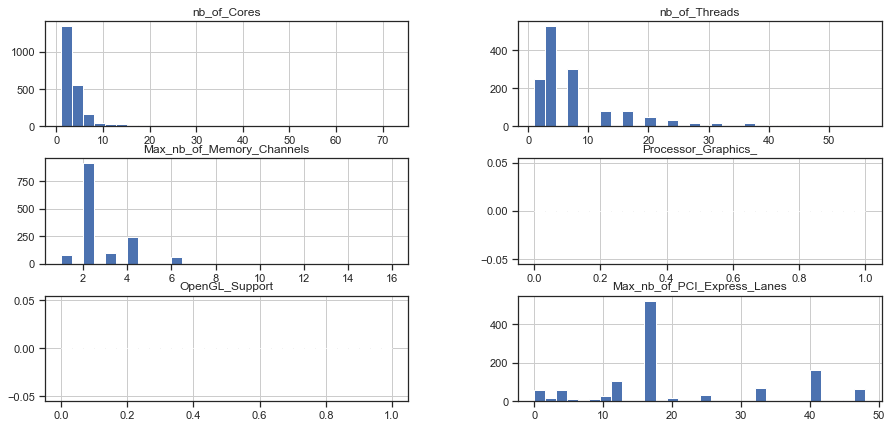

In [14]:
# Гистограммы для всех признаков
data.hist(bins=30, figsize = (15,7))

<Figure size 864x432 with 0 Axes>

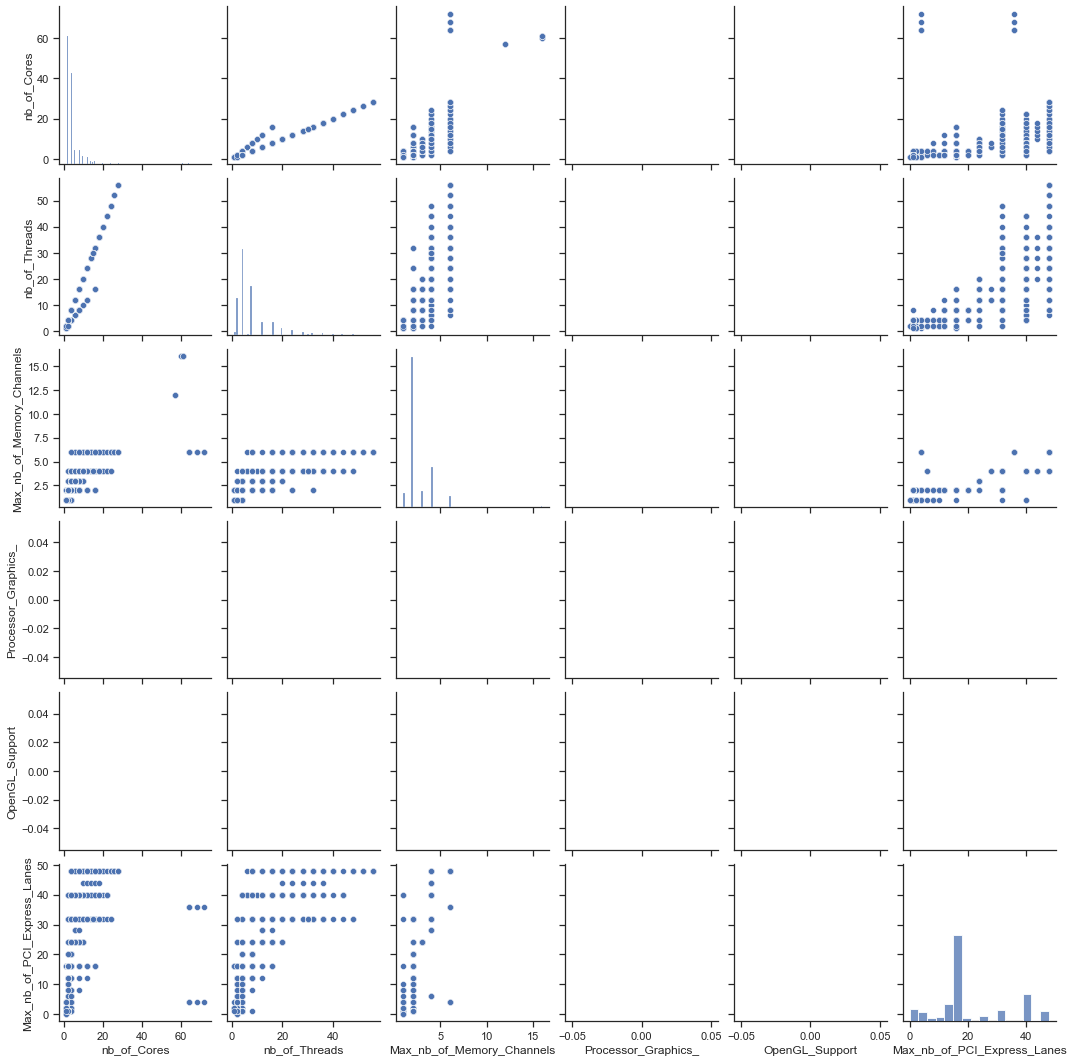

In [15]:
# Диаграммы рассеяние для всех признаков
plt.figure(figsize=(12,6))
sns.pairplot(data)

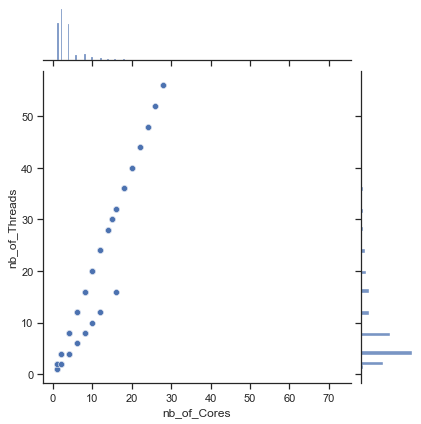

In [17]:
# Увеличенные диаграммы рассеяния для признаков, которые имеют зависимость
sns.jointplot(x = "nb_of_Cores", y = "nb_of_Threads", kind="scatter", data = data)

## 4) Корреляции признаков

In [18]:
corr_matrix = data.corr()

In [19]:
corr_matrix['nb_of_Cores']

nb_of_Cores                    1.000000
nb_of_Threads                  0.978421
Max_nb_of_Memory_Channels      0.782281
Processor_Graphics_                 NaN
OpenGL_Support                      NaN
Max_nb_of_PCI_Express_Lanes    0.489602
Name: nb_of_Cores, dtype: float64

<AxesSubplot:>

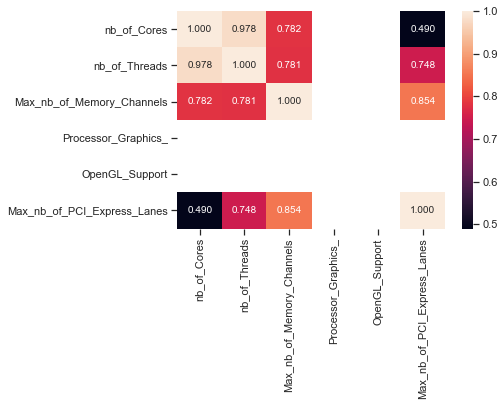

In [20]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')